In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Customer_Segmentation.csv')

In [5]:
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12/04/2016,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,02/04/2014,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,02/04/2016,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,04/03/2014,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [7]:
data.shape

(113036, 18)

In [9]:
data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [11]:
data.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

## Data Understanding and Exploration

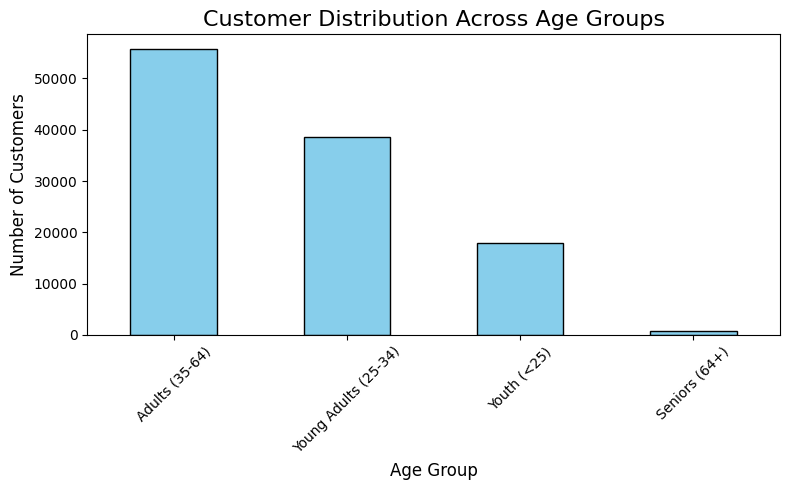

In [20]:
# Distribution of customers across different age groups
age_group_distribution = data['Age_Group'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
age_group_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer Distribution Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

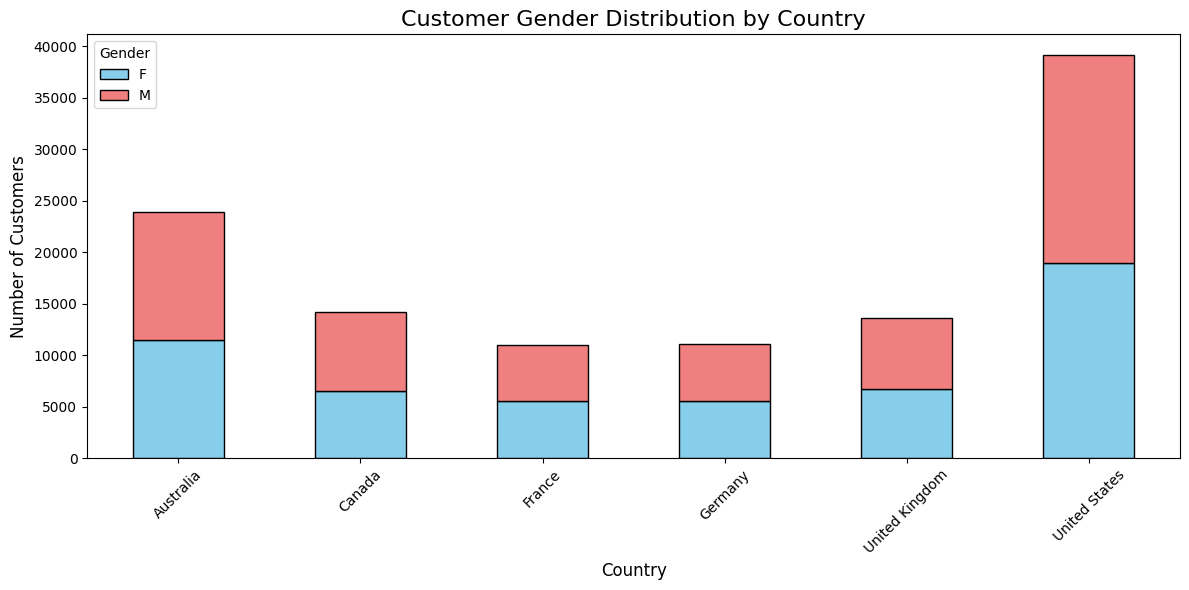

In [26]:
# Gender distribution across different countries
gender_country_distribution = data.groupby(['Country', 'Customer_Gender']).size().unstack()

# Plot gender distribution by country
gender_country_distribution.plot(kind='bar', figsize=(12, 6), stacked=True, color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Customer Gender Distribution by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Gender', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

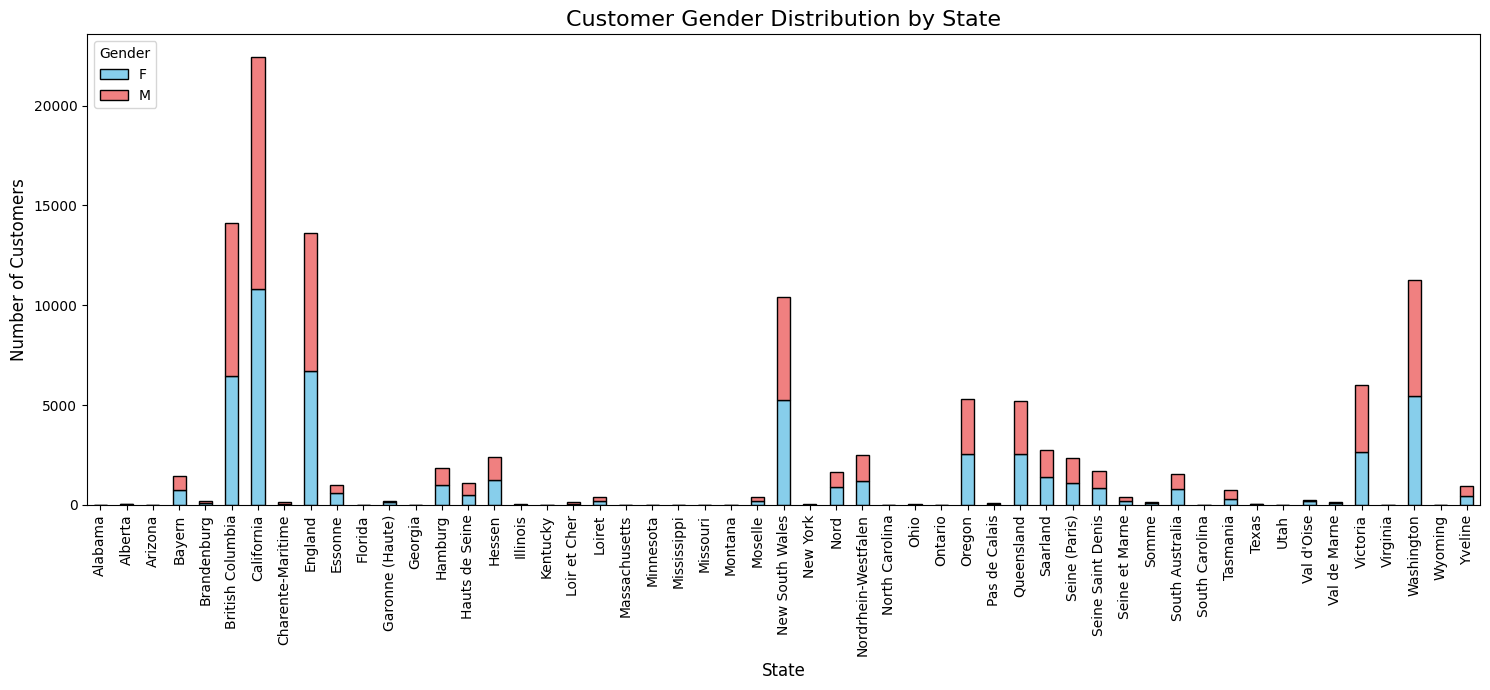

In [28]:
gender_state_distribution = data.groupby(['State', 'Customer_Gender']).size().unstack()

# Plot gender distribution by state
gender_state_distribution.plot(kind='bar', figsize=(15, 7), stacked=True, color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Customer Gender Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Gender', loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
# Most popular product categories and subcategories based on order quantity
product_category_popularity = data.groupby('Product_Category')['Order_Quantity'].sum().sort_values(ascending=False)
subcategory_popularity = data.groupby('Sub_Category')['Order_Quantity'].sum().sort_values(ascending=False)

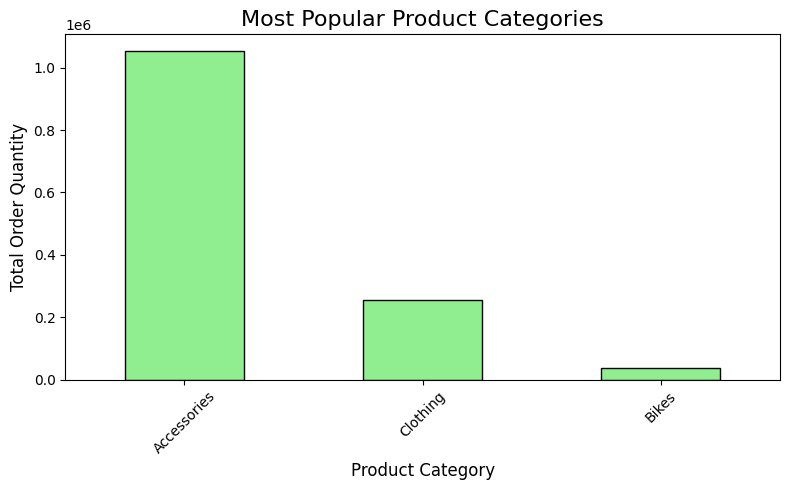

In [36]:
# Plot most popular product categories
plt.figure(figsize=(8, 5))
product_category_popularity.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Most Popular Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Order Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

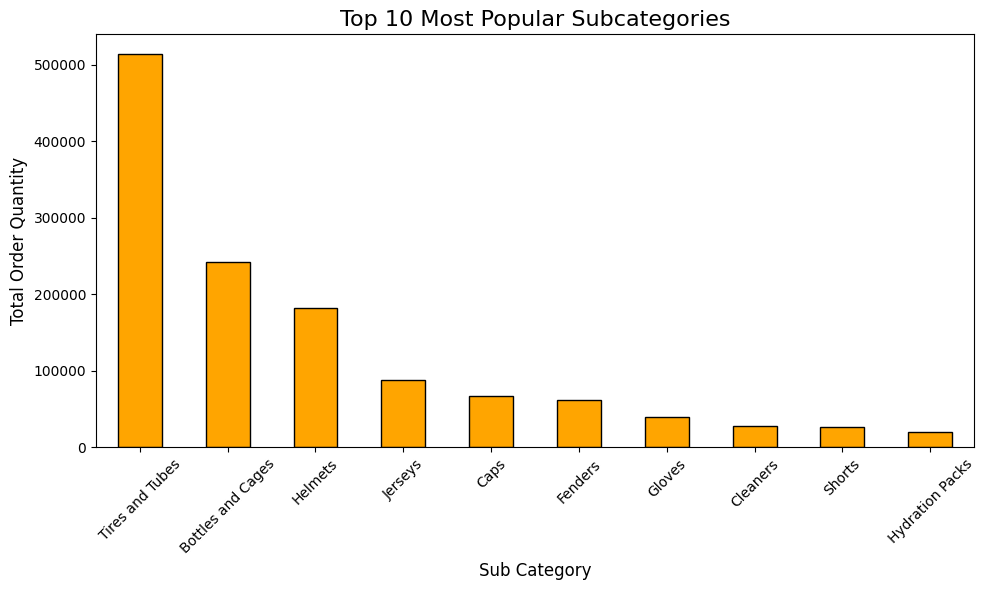

In [34]:
# Plot most popular subcategories
plt.figure(figsize=(10, 6))
subcategory_popularity.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Popular Subcategories', fontsize=16)
plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Total Order Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Clustering for Segmentation

In [41]:
# Select relevant columns for clustering
clustering_data = data[['Order_Quantity', 'Profit', 'Revenue']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Convert scaled data back to a DataFrame for better readability
scaled_df = pd.DataFrame(scaled_data, columns=clustering_data.columns)

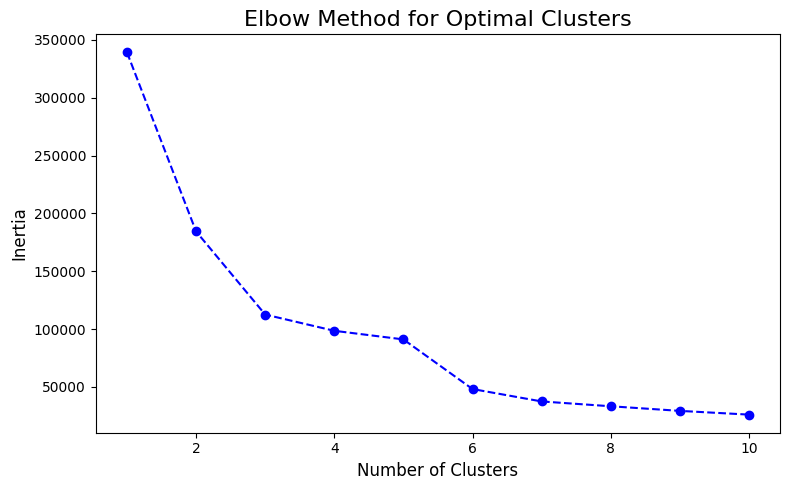

In [43]:
# Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.tight_layout()
plt.show()


In [45]:
# Choose the optimal number of clusters based on the elbow method
optimal_clusters = 4  # Adjust this based on the elbow plot

# Fit K-Means model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# View cluster centroids
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=clustering_data.columns)
print("Cluster Centroids:\n", cluster_centroids)


Cluster Centroids:
    Order_Quantity    Profit   Revenue
0       -0.900756 -0.282758 -0.209114
1       -1.060557  2.165110  2.225587
2        0.238922 -0.389521 -0.406097
3        1.370051 -0.122575 -0.226684


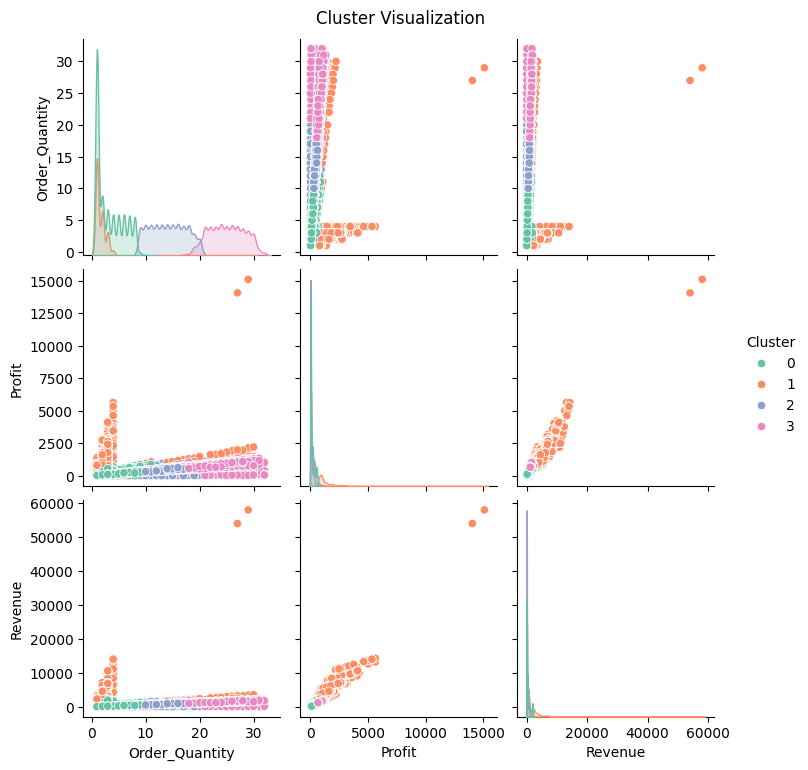

In [47]:
sns.pairplot(data, vars=['Order_Quantity', 'Profit', 'Revenue'], hue='Cluster', palette='Set2')
plt.suptitle('Cluster Visualization', y=1.02)
plt.show()


In [51]:
# Calculate the mean of features for each cluster
cluster_characteristics = data.groupby('Cluster')[['Order_Quantity', 'Profit', 'Revenue', 'Customer_Age']].mean()

# Additional demographic characteristics by cluster (e.g., Age Group and Gender distribution)
cluster_demographics = data.groupby('Cluster')[['Age_Group', 'Customer_Gender']].agg(lambda x: x.mode()[0])

# Displaying the characteristics of each cluster
print("Cluster Characteristics:\n", cluster_characteristics)
print("\nCluster Demographics:\n", cluster_demographics)



Cluster Characteristics:
          Order_Quantity       Profit      Revenue  Customer_Age
Cluster                                                        
0              3.288800   156.712052   480.622125     35.573880
1              1.760811  1267.763683  3667.860938     35.644248
2             14.183613   108.085128   222.410239     36.059500
3             24.996953   229.514407   457.828610     36.335094

Cluster Demographics:
               Age_Group Customer_Gender
Cluster                                
0        Adults (35-64)               M
1        Adults (35-64)               F
2        Adults (35-64)               M
3        Adults (35-64)               M


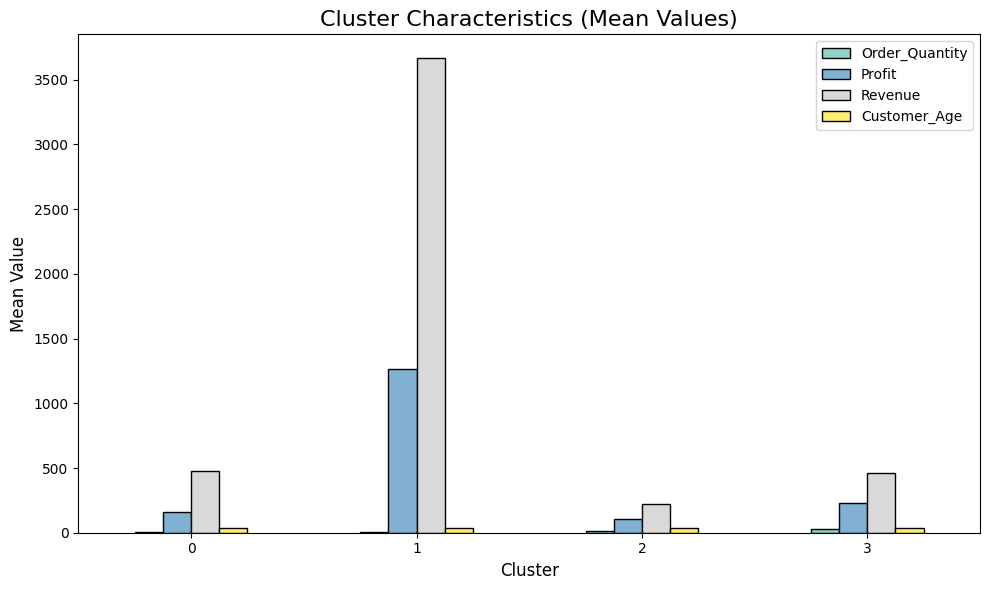

In [53]:
# Plotting the characteristics of each cluster (mean Order_Quantity, Profit, Revenue)
cluster_characteristics.plot(kind='bar', figsize=(10, 6), edgecolor='black', colormap='Set3')
plt.title('Cluster Characteristics (Mean Values)', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Profitability and Revenue Analysis

In [56]:
# Calculate total profit and revenue for each Product_Category and Sub_Category
category_profit_revenue = data.groupby('Product_Category')[['Profit', 'Revenue']].sum().sort_values(by='Profit', ascending=False)
subcategory_profit_revenue = data.groupby('Sub_Category')[['Profit', 'Revenue']].sum().sort_values(by='Profit', ascending=False)

# Display the top product category and subcategory
print("Top Product Categories by Profit and Revenue:\n", category_profit_revenue.head(1))
print("\nTop Sub-Categories by Profit and Revenue:\n", subcategory_profit_revenue.head(1))

Top Product Categories by Profit and Revenue:
                     Profit   Revenue
Product_Category                    
Bikes             20519276  61782134

Top Sub-Categories by Profit and Revenue:
                 Profit   Revenue
Sub_Category                    
Road Bikes    10078875  33363061


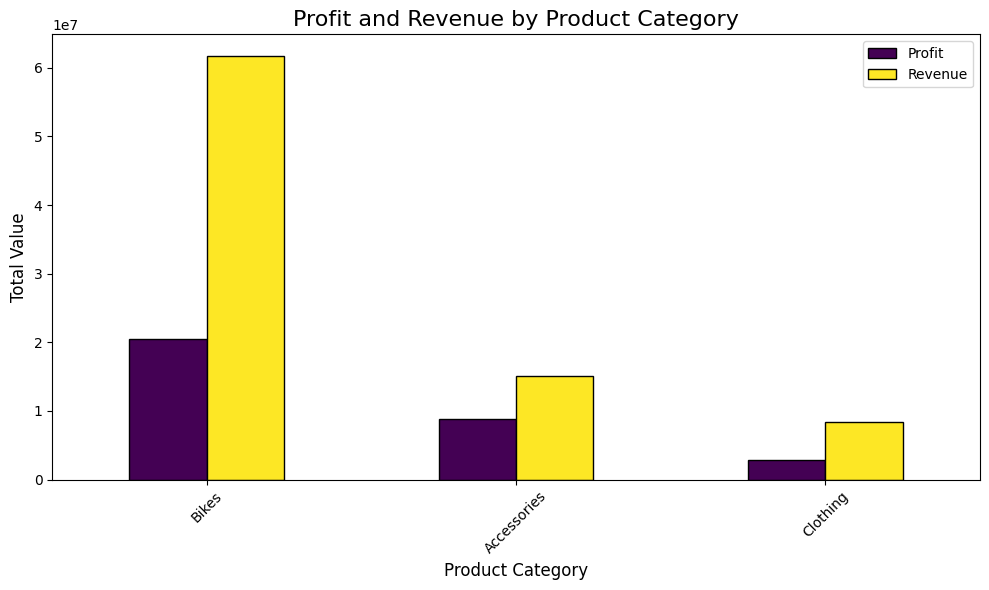

In [58]:
# Plotting the top Product Categories by Profit and Revenue
category_profit_revenue.plot(kind='bar', figsize=(10, 6), edgecolor='black', colormap='viridis')
plt.title('Profit and Revenue by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

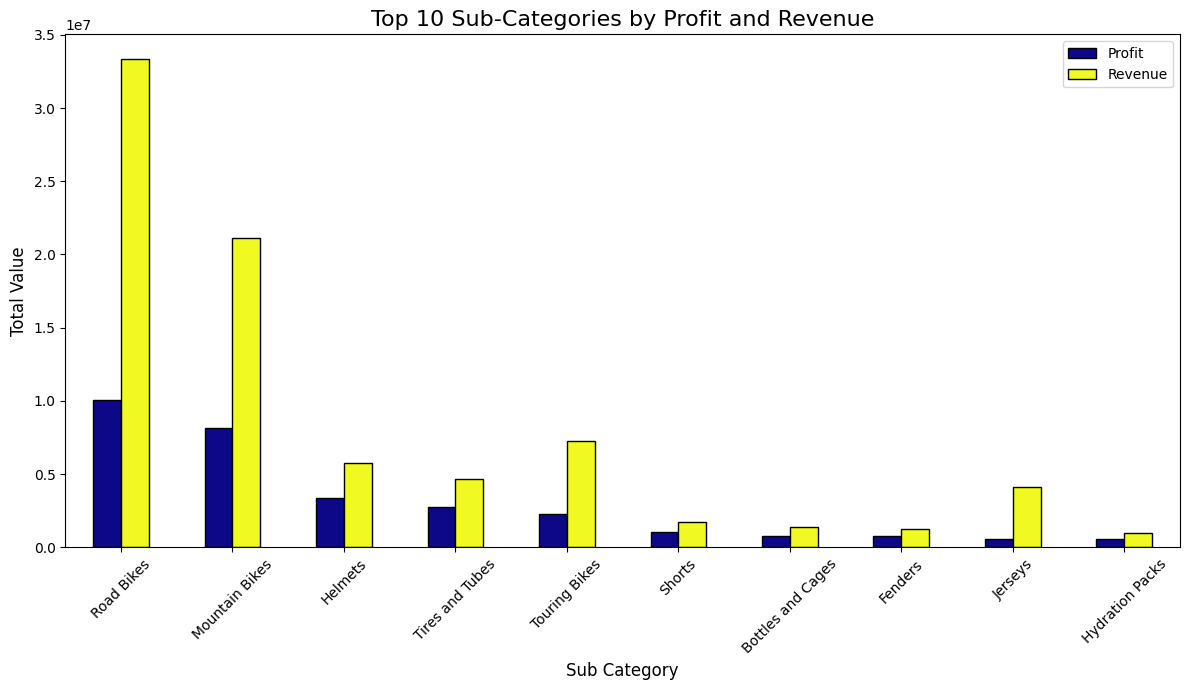

In [62]:
# Plotting the top Sub-Categories by Profit and Revenue
subcategory_profit_revenue.head(10).plot(kind='bar', figsize=(12, 7), edgecolor='black', colormap='plasma')
plt.title('Top 10 Sub-Categories by Profit and Revenue', fontsize=16)
plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Demographic Insights

In [65]:
age_group_contribution = data.groupby('Age_Group')[['Revenue', 'Profit']].sum().sort_values(by='Revenue', ascending=False)
print("Revenue and Profit by Age Group:\n", age_group_contribution)

Revenue and Profit by Age Group:
                        Revenue    Profit
Age_Group                               
Adults (35-64)        42584153  16321582
Young Adults (25-34)  30655614  11386761
Youth (<25)           11723199   4374592
Seniors (64+)           308042    138165


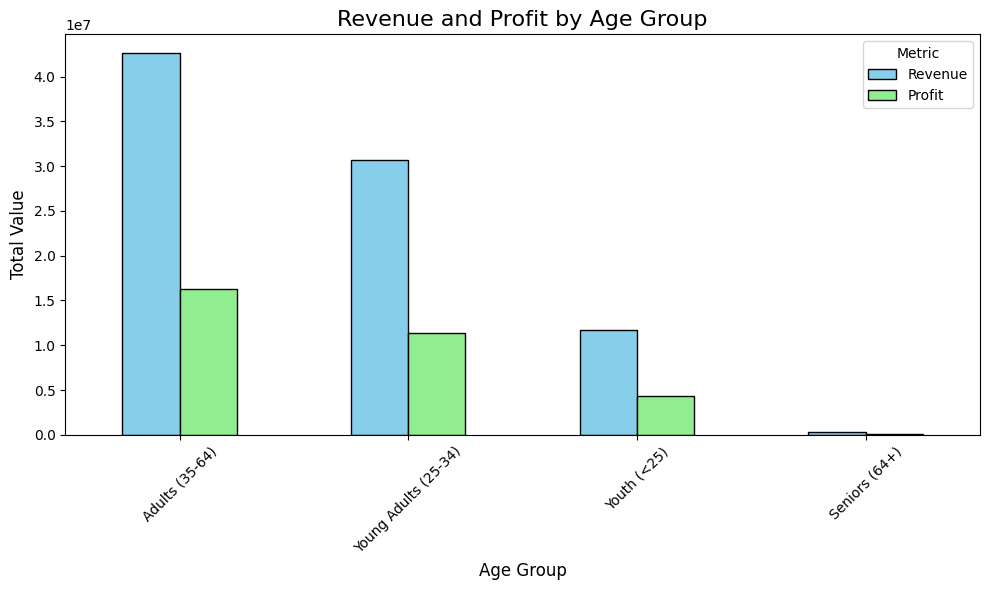

In [67]:
# Plotting Revenue and Profit by Age Group
age_group_contribution.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Revenue and Profit by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## Time-Series Analysis

In [70]:
# Extract Year and Month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month_name()

In [74]:
# Group by Year and calculate total Revenue and Profit
yearly_trends = data.groupby('Year')[['Revenue', 'Profit']].sum()

# Group by Month and calculate average Revenue and Profit
monthly_trends = data.groupby('Month')[['Revenue', 'Profit']].mean()

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_trends = monthly_trends.reindex(month_order)
monthly_trends 

,Revenue,Profit
Month,,
January,754.620315,282.046639
February,757.546331,284.008202
March,759.475295,285.493694
April,746.685327,281.351306
May,794.101636,298.969896
June,804.967776,301.191294
July,766.746047,286.752881
August,696.486951,270.024878
September,715.391256,275.491183


<Figure size 1000x600 with 0 Axes>

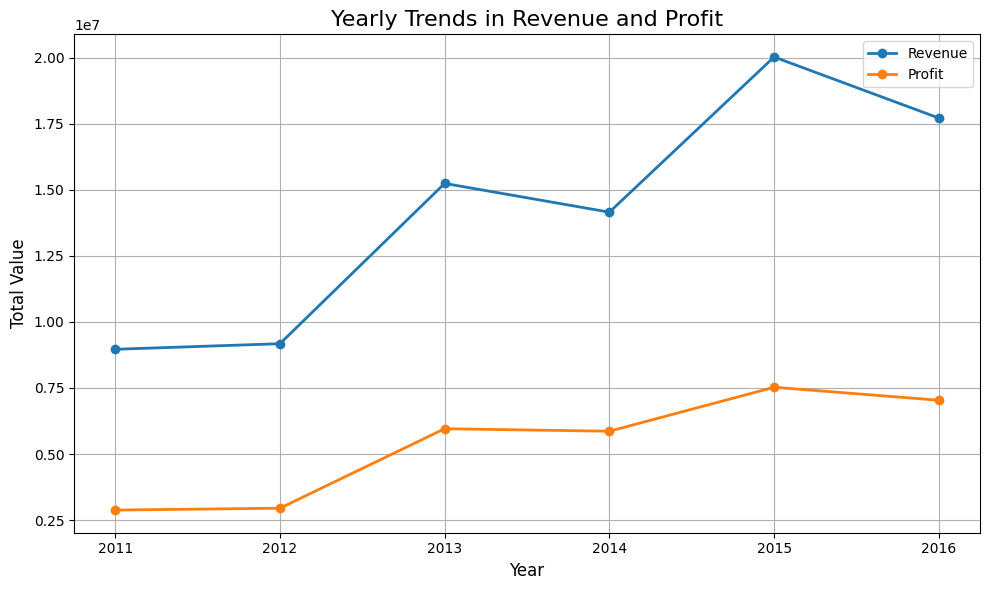

In [76]:
# Plot Yearly Trends
plt.figure(figsize=(10, 6))
yearly_trends.plot(kind='line', marker='o', linewidth=2, figsize=(10, 6))
plt.title('Yearly Trends in Revenue and Profit', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

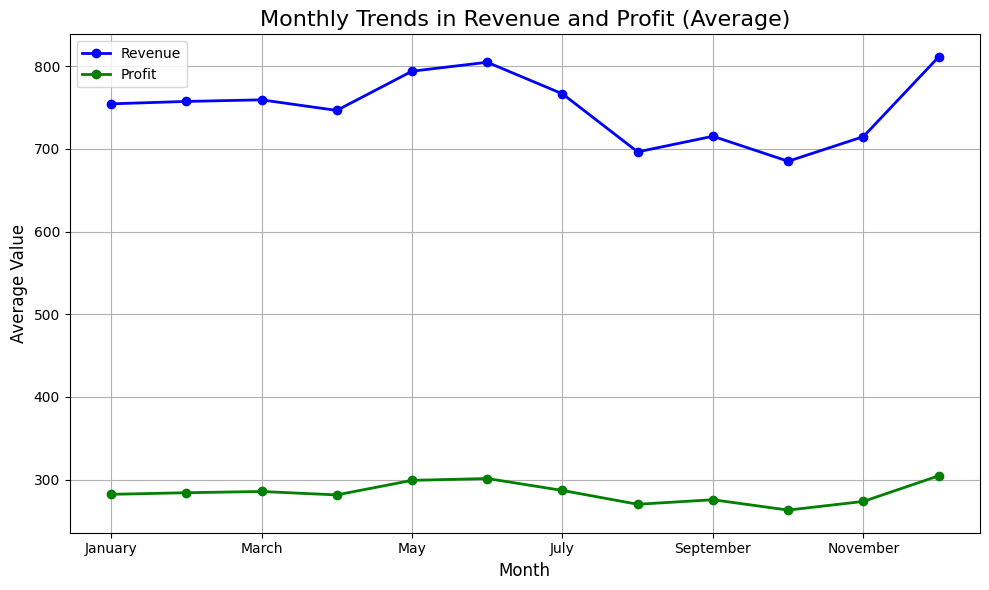

In [78]:

# Plot Monthly Trends
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o', linewidth=2, figsize=(10, 6), color=['blue', 'green'])
plt.title('Monthly Trends in Revenue and Profit (Average)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Building

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define 'high order quantity' threshold (e.g., greater than 10)
data['High_Order'] = (data['Order_Quantity'] > 10).astype(int)

# Select features for prediction
features = ['Customer_Age', 'Age_Group', 'Customer_Gender', 'Product_Category', 'Sub_Category', 'Unit_Cost', 'Unit_Price']
X = data[features]
y = data['High_Order']

# Encode categorical variables
encoder = LabelEncoder()
for col in ['Age_Group', 'Customer_Gender', 'Product_Category', 'Sub_Category']:
    X[col] = encoder.fit_transform(X[col])

# Standardize numerical features
scaler = StandardScaler()
X[['Customer_Age', 'Unit_Cost', 'Unit_Price']] = scaler.fit_transform(X[['Customer_Age', 'Unit_Cost', 'Unit_Price']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[ 5894  5495]
 [  613 10606]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.52      0.66     11389
           1       0.66      0.95      0.78     11219

    accuracy                           0.73     22608
   macro avg       0.78      0.73      0.72     22608
weighted avg       0.78      0.73      0.72     22608


Accuracy Score: 0.7298301486199575


## Visualization

In [86]:
# Group data by Country and State to count customers
country_distribution = data['Country'].value_counts()
state_distribution = data['State'].value_counts()

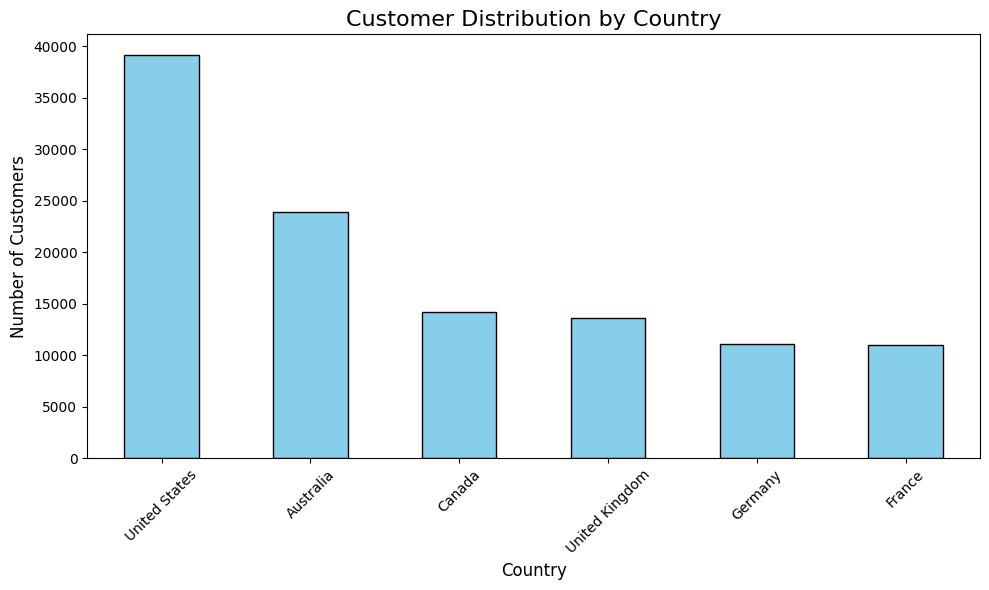

In [88]:
# Plot customer distribution by Country
plt.figure(figsize=(10, 6))
country_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer Distribution by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [90]:
# Calculate total Revenue and Profit for each Product Category
category_revenue_profit = data.groupby('Product_Category')[['Revenue', 'Profit']].sum()

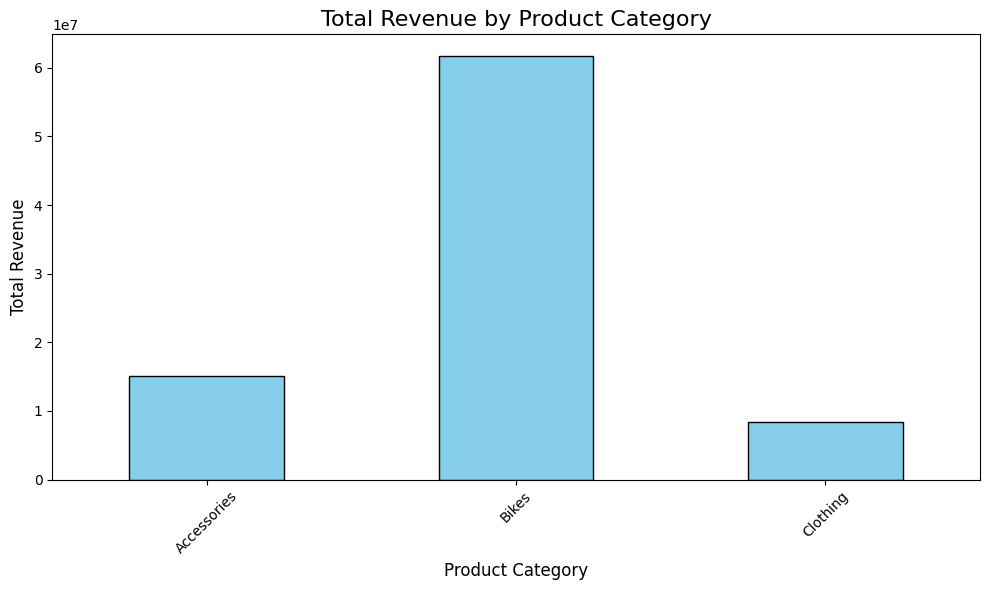

In [92]:
# Plot Revenue for each Product Category
plt.figure(figsize=(10, 6))
category_revenue_profit['Revenue'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Revenue by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

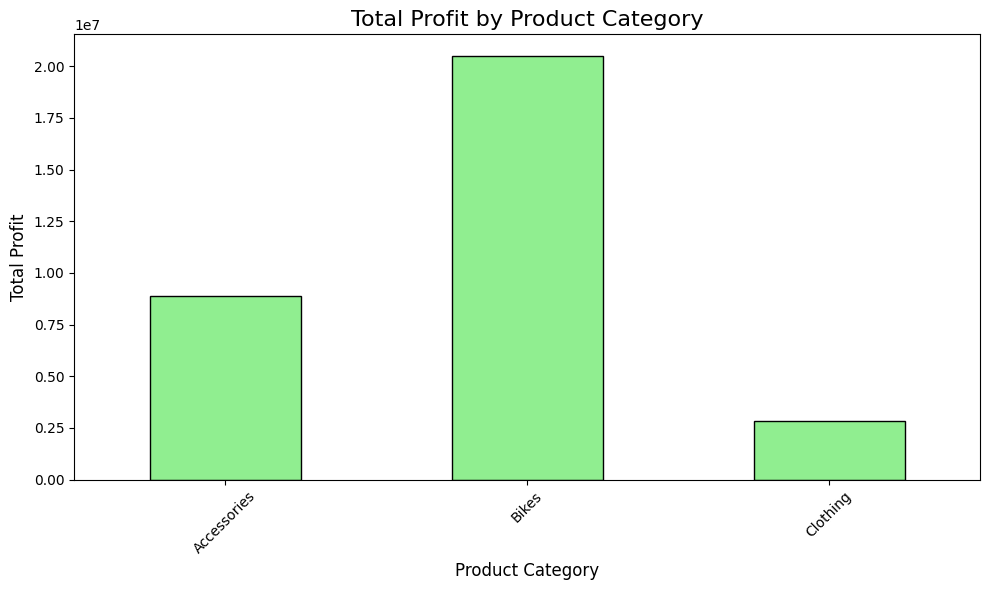

In [94]:
# Plot Profit for each Product Category
plt.figure(figsize=(10, 6))
category_revenue_profit['Profit'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Total Profit by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

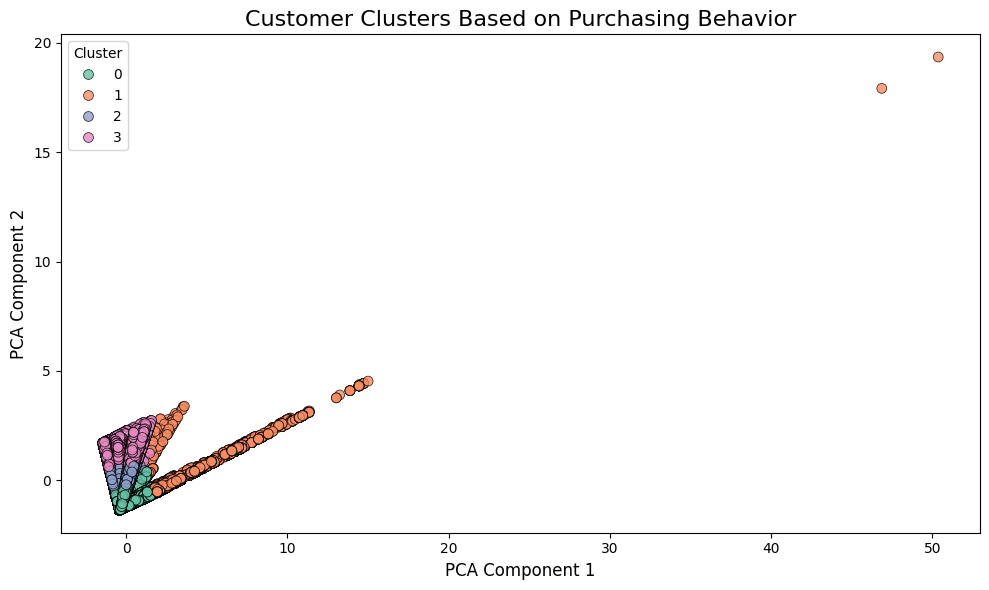

In [96]:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_data = data[['Order_Quantity', 'Profit', 'Revenue']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=data,
    palette='Set2', s=50, alpha=0.8, edgecolor='k'
)
plt.title('Customer Clusters Based on Purchasing Behavior', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
